#Customer Churn Analysis
##Problem Statement :
-What percentage of customers are currently churning at telco base Company, and what are the primary reasons behind their churn?






In [1]:
import pandas as pd  #to work with data frames
import numpy as np  #used for numerical operations
import statistics as st #for statistical solutions
import matplotlib.pyplot as plt #used for visualization
import seaborn as sns  #used to visualization
import matplotlib.ticker as mtick


In [2]:
telco_data = pd.read_csv('Customer-Churn.csv')  #reading the dataset

#Exploring dataset

In [3]:
telco_data.head() #head() function gives first five rows by default ,by which we can get to know about the data



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_data.info() #info() function returns the non-null values along with the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 



-  converting the datatype of the 'TotalCharges' column, which is initially classified as an object, into a numeric format using pd.to_numeric function


In [5]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges , errors='coerce') #it will convert the column from object to numerical and errors = 'coerce' will return errors as NAN values

validating whether the TotalCharges column has been converted or not

In [6]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Describe() functions gives a statistical table of the Dataset which shows the central tendency ,data disperssion and shape of the data set .

In [7]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#checking the dataset with the null values

In [8]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

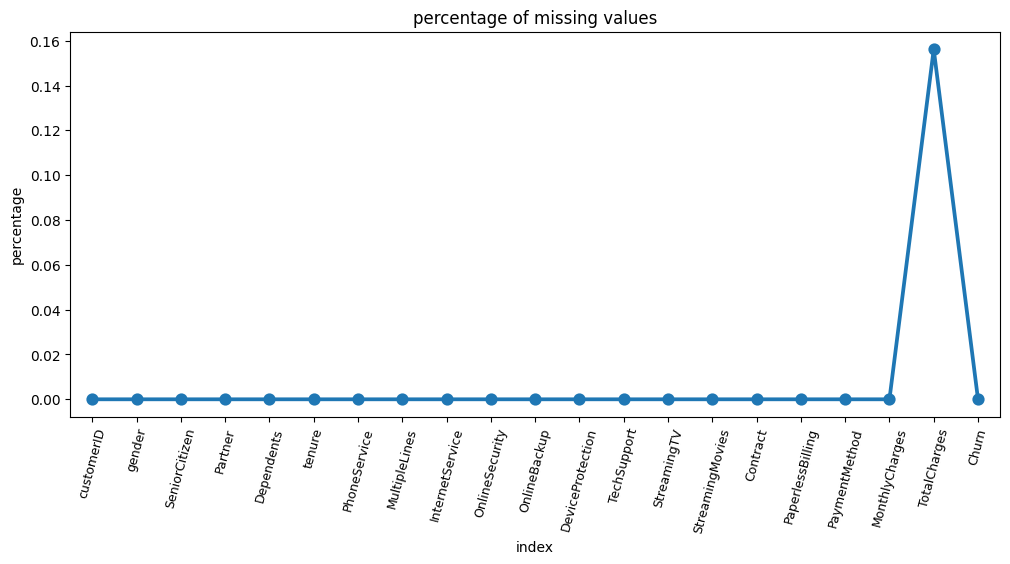

In [9]:
missing = pd.DataFrame(telco_data.isnull().sum()*100/telco_data.shape[0]).reset_index()
plt.figure(figsize=(12,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation=75 , fontsize=9)
plt.title('percentage of missing values')
plt.ylabel('percentage')
plt.show()


- Here we can clearly see that the data has about 0.15% of rows will null values therefore,we need to  deal with the missing value
#cleaning the Data
TotalCharges has about 11 rows of missing values
- Here we can drop the missing values using dropna() function or we can fill the null values with fillna() functionusing mean, mode and median depending on the data set

In [10]:
telco_data.dropna(how='any' ,inplace=True) #dropping null values, inplace = True will make the changes in the original data set too

In [11]:
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
len(telco_data) #length of the dataset has been decreased after dropping the rows with null values


7032

- diving the data of tenure column  into bins.
-for tenure < 12 months : assign tenure group 0-12
-for tenure 12-24 months : assing tenure group 12-24 and so on..
- before dividing knowing the value counts of tenure

In [13]:
#getting the minimum value
telco_data['tenure'].min()

1

In [14]:
#getting the maximum value of the column
telco_data['tenure'].max()

72

In [15]:
#getting the value counts
telco_data.tenure.value_counts()  #here we get the values associated with each number

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

In [16]:
#grouping tenure into respected bins
label = ['{0} - {1}'.format(i,i+11) for i in range(1,72,12)]


In [17]:
telco_data['tenure_group'] = pd.cut(telco_data.tenure,range(1,80,12), right=False,labels=label)

In [18]:
telco_data.tenure_group.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

- dropping insignificant columns inorder to make data more simple and efficient

In [19]:
 cols = ['customerID','tenure']#reating a set of columns that has to be removed
 telco_data.drop(columns = cols ,axis = 1,inplace=True) #calling drop function to delete unwanted columns and placing inplace =True which will make the changes in the original data set tp

#EXPLORATORY DATA ANALYSIS :
###Categorical univariate analysis -

#variable gender

In [20]:
pd.crosstab(telco_data['gender'],columns='count',normalize=True)

col_0,count
gender,
Female,0.495307
Male,0.504693


- there are about 49% of female customers and 50% of male customers
###plotting graphs in order to check the churn rate according to gender

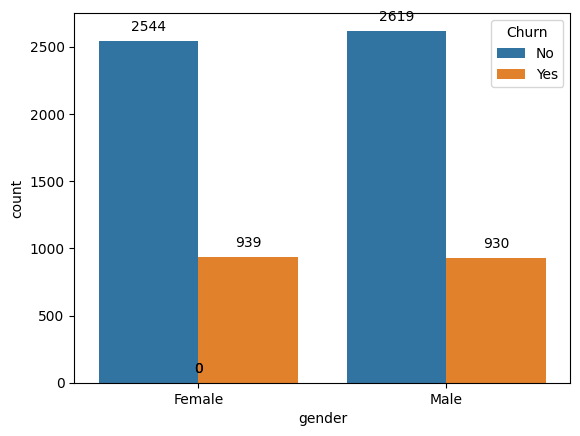

In [21]:
# Generate the countplot
ax = sns.countplot(x=telco_data['gender'], hue=telco_data['Churn'])
# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

# Show the plot
plt.show()


- In the variable gender the churn rate of femal eis given as 26.95%
-In the variablle gender the churn rate of male is given as 26.20%
- therfore , the churn rate of female and male is more or less same only

#variable Senior citizen

In [22]:
pd.crosstab(telco_data['SeniorCitizen'],columns='count',normalize=True)

col_0,count
SeniorCitizen,
0,0.8376
1,0.1624


- there are about 83% customer who are not senior citizen.
-only 16.24% of cutomers include into the senior citizen group.
###plotting graphs to analyze the amount of churn rate among the people who are senior citizen and who are not senior citizen.

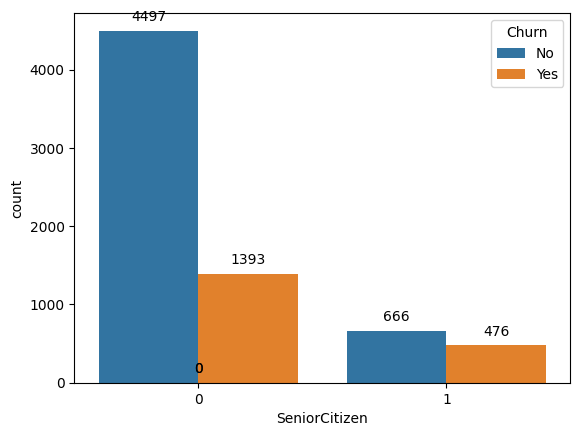

In [23]:

# Generate the countplot
ax = sns.countplot(x=telco_data['SeniorCitizen'], hue=telco_data['Churn'])

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

# Show the plot
plt.show()

- The churn rate of those who are not senior citizen is given as 23.65%
- The churn rate of those who are senior citizen is given as 41.68%
- the churn rate differs allot.
##variable Partner

In [24]:
pd.crosstab(telco_data['Partner'],columns='count',normalize=True)

col_0,count
Partner,
No,0.517491
Yes,0.482509


- there are about 51.74% of customers without partners
-there are about 48.25% of customers with partners.
###plotting graphs to analyze the churn rate among customers with and without partners


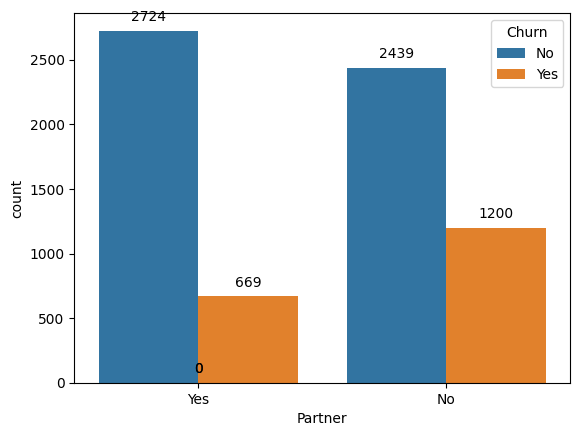

In [25]:

# Generate the countplot
ax = sns.countplot(x=telco_data['Partner'], hue=telco_data['Churn'])

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

# Show the plot
plt.show()

- the churn rate of people with partner is given as 19.72%
- The churn rate of people without partner is given as 32.97%
- Therefore, people without partners are churning more when compared to people with partners.


 ## variable dependents

In [26]:
pd.crosstab(telco_data['Dependents'],columns='count',normalize=True)

col_0,count
Dependents,
No,0.701507
Yes,0.298493


- there are about 70.15% of customers who are independent.
- there are about 29.84% of customers who are dependents
### plotting graphs to analyze the churn rate of customers who are dependent and independent

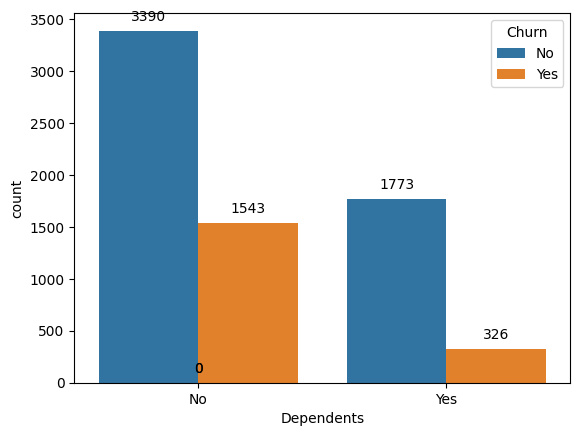

In [27]:

# Generate the countplot
ax = sns.countplot(x=telco_data['Dependents'], hue=telco_data['Churn'])

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

# Show the plot
plt.show()

- The churn rate of people with no dependemts is about 31.27%
- the churn rate of people with dependencies is about  15.53%
- Therefor the churn rate of people with no dependents  is more when compared to people with dependencies.

## variable PhoneService

In [28]:
pd.crosstab(telco_data['PhoneService'],columns='count',normalize=True)

col_0,count
PhoneService,
No,0.096701
Yes,0.903299


-there are nearly 9.67% of customers without phone service
-there are about 90.32% of cutomers with phone services
##plotting graphs to analyze the churn rate of people with and without phone services

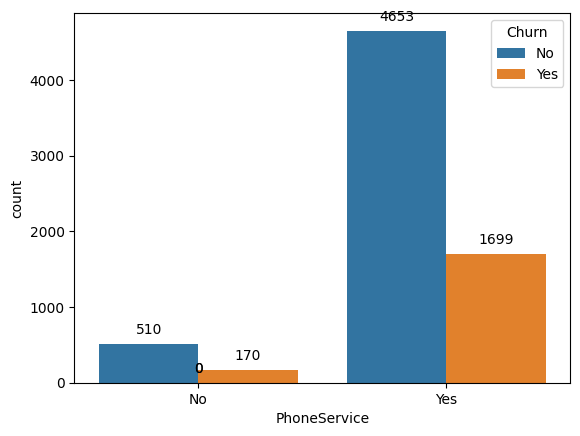

In [29]:

# Generate the countplot
ax = sns.countplot(x=telco_data['PhoneService'], hue=telco_data['Churn'])

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

# Show the plot
plt.show()

- The churn rate of people with no PhoneServices is about 25%
- the churn rate of people with phone services is about 26.74%
- the churn rate does not differ allot.

 ## variable multiple lines



In [30]:
pd.crosstab(telco_data['MultipleLines'],columns='count',normalize=True)

col_0,count
MultipleLines,
No,0.481371
No phone service,0.096701
Yes,0.421928


- there are about 48.13% of customers without multiple lines
-there are about 9.67% of customers with no phone sevices
- there are about 42.19% of customers with multiple lines

###plotting graphs inorder to analyze the churnrate of customers with and without multiple lines

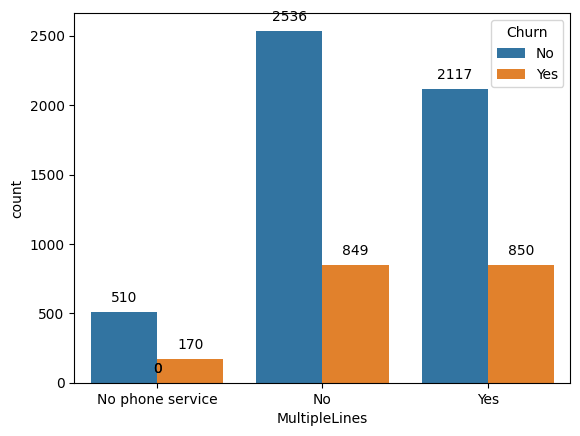

In [31]:

# Generate the countplot
ax = sns.countplot(x=telco_data['MultipleLines'], hue=telco_data['Churn'])

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

# Show the plot
plt.show()

- the churn rate for people without phoneservices are 25%
-The people with no Multiple lines are about 26.6%
-the people with Multiple lines are about 28.64%
-which brings slight difference between people having multiple lines and people without multiple lines.
## internet service



In [32]:
pd.crosstab(telco_data['InternetService'],columns='count',normalize=True)

col_0,count
InternetService,
DSL,0.343572
Fiber optic,0.440273
No,0.216155


- there are about 34.35% of customers with DSL internet service
-there are about 44.02% of customers with fiber optic internet service
-there are about 21.61% of customers without any internet services

###plotting graph to analyze the churn rate of customers with different internet services


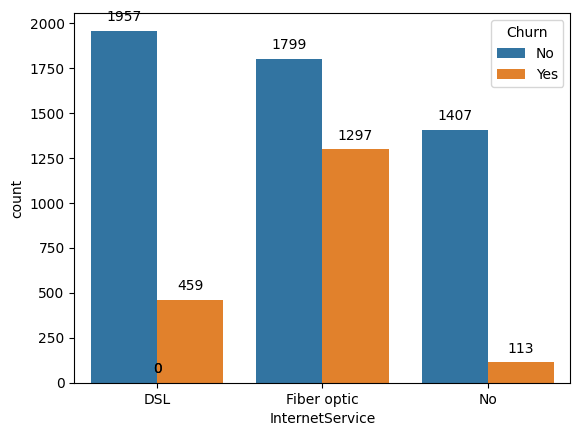

In [33]:

# Generate the countplot
ax = sns.countplot(x=telco_data['InternetService'], hue=telco_data['Churn'])

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

# Show the plot
plt.show()

- the churn rate of people having DSL is about 18.99%
- the churn rate of people having fibreoptic as their internet services is about 41%
- the churn rate of people who have no internet services is about 7.4%
-therefore the churn rate of people that has fiberoptic as there internet service has more churn rate compared to DSL and no internet service .

 ## OnlineSecurity

In [34]:
pd.crosstab(telco_data['OnlineSecurity'],columns='count',normalize=True)

col_0,count
OnlineSecurity,
No,0.497298
No internet service,0.216155
Yes,0.286547


- there are about 49.72% of customers who doesnot have any online security.
-there are about 21.61% of customers with out any internet services.
-there are about 28.65% of customers with online security
###plotting graphs to analyze the churn rate of people with and without online security

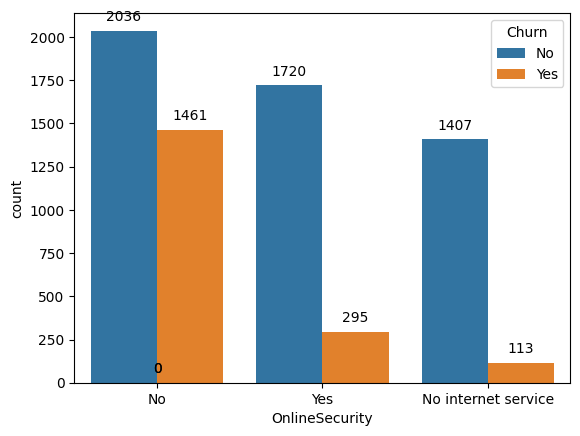

In [35]:

# Generate the countplot
ax = sns.countplot(x=telco_data['OnlineSecurity'], hue=telco_data['Churn'])

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

# Show the plot
plt.show()

- the churn rate of people not having online security is about 41.77%
- the churn rate of people having online security is about 14.64%
- the churn rate of people with no internet services is about 7.43%
## variable online backup

In [36]:
pd.crosstab(telco_data['OnlineBackup'],columns='count',normalize=True)

col_0,count
OnlineBackup,
No,0.438993
No internet service,0.216155
Yes,0.344852


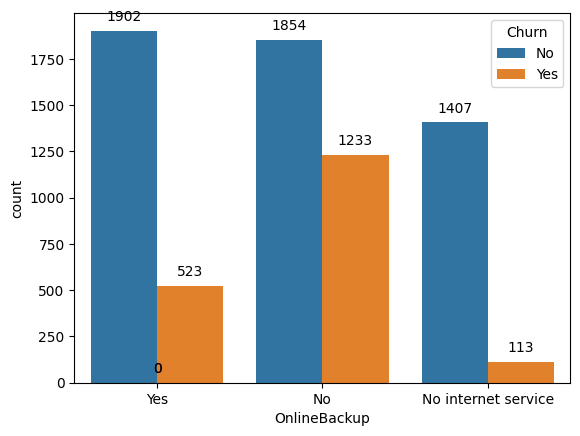

In [37]:

# Generate the countplot
ax = sns.countplot(x=telco_data['OnlineBackup'], hue=telco_data['Churn'])

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

# Show the plot
plt.show()

- the churn rate of customers who have online backup is about 21.57%
- the churn rate of customers with no online backup is about 39.94%
- the churn rate of customers with no internet service is about 7.43%
- therefore the churn rate of customers with no online backup has more churnrate when compared to customers who have online backup

## DeviceProtection

In [38]:
pd.crosstab(telco_data['DeviceProtection'],columns='count',normalize=True)

col_0,count
DeviceProtection,
No,0.439989
No internet service,0.216155
Yes,0.343857


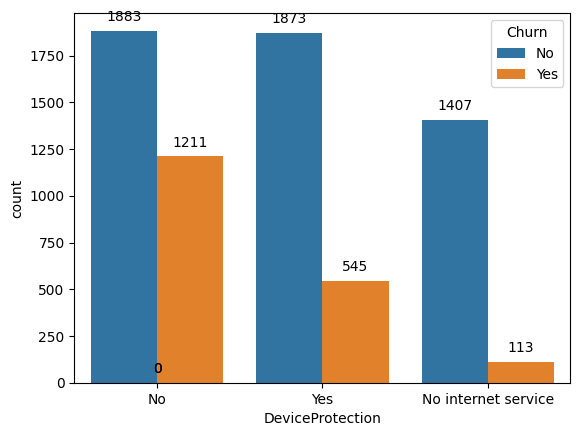

In [39]:

# Generate the countplot
ax = sns.countplot(x=telco_data['DeviceProtection'], hue=telco_data['Churn'])

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

# Show the plot
plt.show()

- the churn rate of customers with no device protection is about 39.14%
- the churn rate of people with Device Protection is about 22.54%
- the churn rate of people with no internet service is about 7.43%
- therefor ethe churn rate of people with no device protection is more that htat of cutomeers with device protection
## variable TechSupport


In [40]:
pd.crosstab(telco_data['TechSupport'],columns='count',normalize=True)

col_0,count
TechSupport,
No,0.493743
No internet service,0.216155
Yes,0.290102


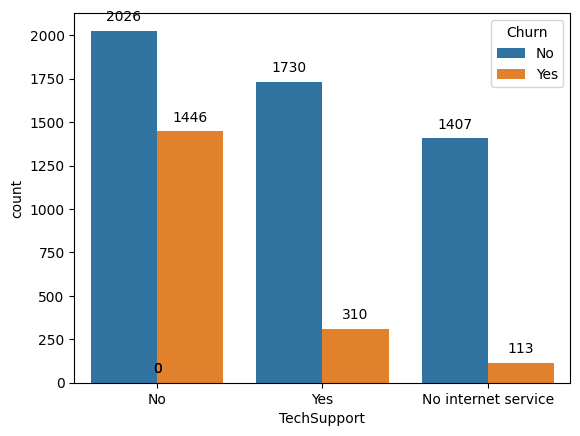

In [41]:

# Generate the countplot
ax = sns.countplot(x=telco_data['TechSupport'], hue=telco_data['Churn'])

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

# Show the plot
plt.show()

- the churn rate of customers with no techc support is about 41.65%
- the churn rate of customers with tech support is about 15.20%
- the churn rate of customers with no internet services is about 7.43%
- therefre the churn rte of people with no tech support is more when compared to people with Techsupport
##variable Stremaing tv

In [42]:
pd.crosstab(telco_data['StreamingTV'],columns='count',normalize=True)

col_0,count
StreamingTV,
No,0.399460
No internet service,0.216155
Yes,0.384386


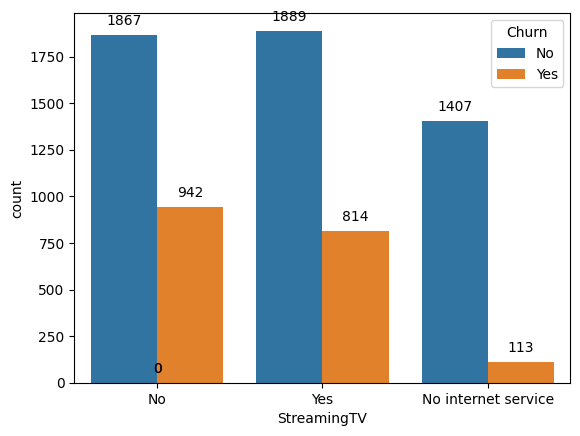

In [43]:

# Generate the countplot
ax = sns.countplot(x=telco_data['StreamingTV'], hue=telco_data['Churn'])

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

# Show the plot
plt.show()

- the churn rate of customers who are not streaming tv s about 33.54%
- the churn rate of customers who are straming tv is about 30.11%
- the churn rate of customers without internet is about 7.43%
-therefore the churn rate doesnot differ allot in this scenario
## variable Streaming movies

In [44]:
pd.crosstab(telco_data['StreamingMovies'],columns='count',normalize=True)

col_0,count
StreamingMovies,
No,0.395478
No internet service,0.216155
Yes,0.388367


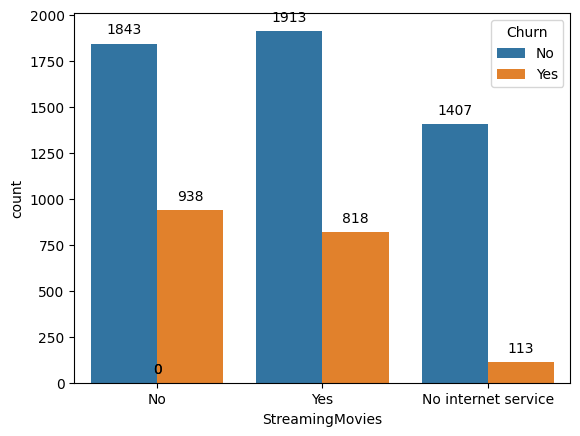

In [45]:

# Generate the countplot
ax = sns.countplot(x=telco_data['StreamingMovies'], hue=telco_data['Churn'])

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

# Show the plot
plt.show()

- the churn rate of customers who are not straming movies is about 33.73%
- the churnrate of customers who are streaming movin=es is about 29.5%
- the churn rate of customers without internet services is about 7.43%
-therefor the churn rate is more or less same as that of customers streaming tv
## variable contract

In [46]:
pd.crosstab(telco_data['Contract'],columns='count',normalize=True)

col_0,count
Contract,
Month-to-month,0.551052
One year,0.209329
Two year,0.239619


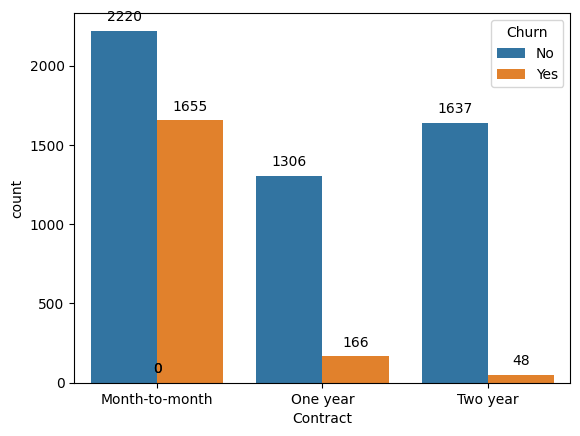

In [47]:

# Generate the countplot
ax = sns.countplot(x=telco_data['Contract'], hue=telco_data['Churn'])

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

# Show the plot
plt.show()

- the churn rate of customers who have month=month contract is about 42.71%
- the churn rate of customers who have one=year contract is about 11.28%
- the churn rate of customers who have teo-yesr contracrt is sbout 2.85%
- therefore the churn is less where the contract is increase
##variable PaperlessBilling

In [48]:
pd.crosstab(telco_data['PaperlessBilling'],columns='count',normalize=True)

col_0,count
PaperlessBilling,
No,0.407281
Yes,0.592719


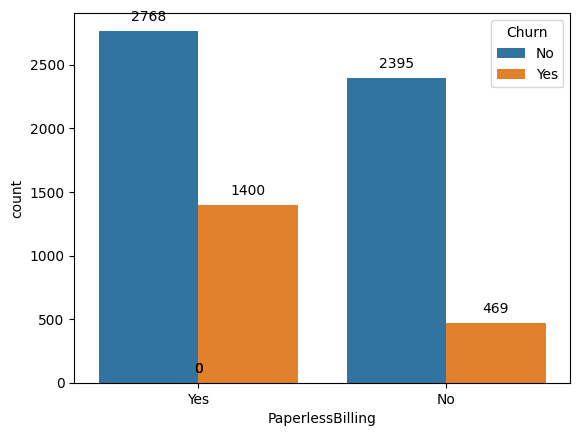

In [49]:

# Generate the countplot
ax = sns.countplot(x=telco_data['PaperlessBilling'], hue=telco_data['Churn'])

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

# Show the plot
plt.show()

- the churn rate of people customers who prefer paperlessbilling is about 33.59%
- the churn rate of customers who does not prefer paperless billing is about 16.38%
- therefore the churn rate is more for people who prefer paperless billing
## variable PaymentMethod

In [50]:
pd.crosstab(telco_data['PaymentMethod'],columns='count',normalize=True)

col_0,count
PaymentMethod,
Bank transfer (automatic),0.219283
Credit card (automatic),0.216297
Electronic check,0.336320
Mailed check,0.228100


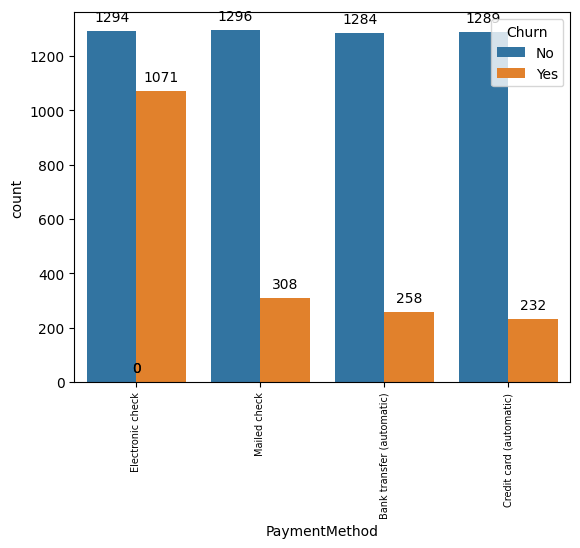

In [51]:

# Generate the countplot
ax = sns.countplot(x=telco_data['PaymentMethod'], hue=telco_data['Churn'])
plt.xticks(rotation=90,fontsize=7)
# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

# Show the plot
plt.show()

- the churn rate of customers whose payment method is Electronic check is about 45.29%
- the churn rate of customers whose payment method is Mailed check is about 19.20%
- the churn rate of customers whose payment method is Bank Transfer is about 26.73%
- the churn rate of customers whose payment method is through Credit card is about 15.25%
- therefore the churn rate id differenty for different payment methods but the highest churnrate among all is from the eltrical check

##variable tenure_group


In [52]:
pd.crosstab(telco_data['tenure_group'],columns='count',normalize=True)

col_0,count
tenure_group,
1 - 12,0.309300
13 - 24,0.145620
25 - 36,0.118316
37 - 48,0.108362
49 - 60,0.118316
61 - 72,0.200085


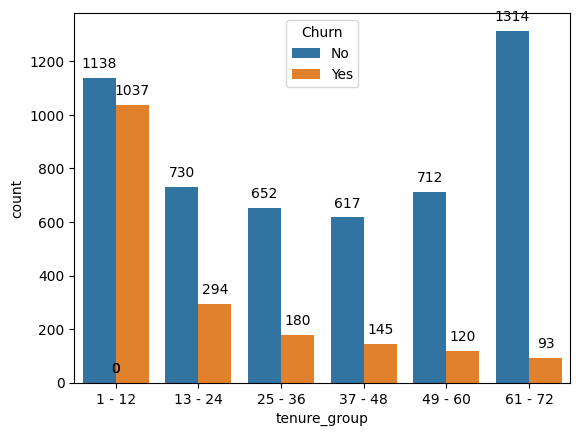

In [53]:

# Generate the countplot
ax = sns.countplot(x=telco_data['tenure_group'], hue=telco_data['Churn'])

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

# Show the plot
plt.show()

- the churnrate for the customers goes like
- 1-12 = 47.68%
-13-24 = 28.71%
- 25-36 = 21.63%
-37-48 = 19.03%
-49-60 = 14.42%
-62-72 = 6.61%



##numerical univariate analysis
###variable monthly charges

<ipython-input-54-a1ef724ef004>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  MonthlyCharges = sns.kdeplot(telco_data.MonthlyCharges[(telco_data.Churn == 'No')],color='Red',shade=True)
<ipython-input-54-a1ef724ef004>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  MonthlyCharges = sns.kdeplot(telco_data.MonthlyCharges[(telco_data.Churn == 'Yes')],color ='Blue',shade=True)


Text(0, 0.5, 'Density')

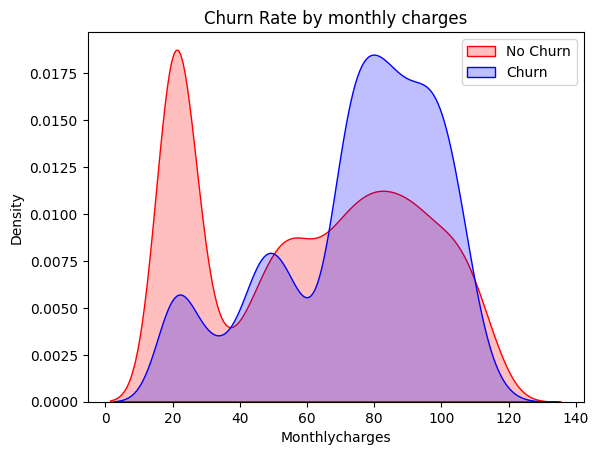

In [54]:
MonthlyCharges = sns.kdeplot(telco_data.MonthlyCharges[(telco_data.Churn == 'No')],color='Red',shade=True)
MonthlyCharges = sns.kdeplot(telco_data.MonthlyCharges[(telco_data.Churn == 'Yes')],color ='Blue',shade=True)
MonthlyCharges.legend(labels=['No Churn','Churn'],loc='upper right')
MonthlyCharges.set_title('Churn Rate by monthly charges')
MonthlyCharges.set_xlabel('Monthlycharges')
MonthlyCharges.set_ylabel('Density')

- the churn rate of customers paying monthly charges is increasing as the charges is increasing
##variable TotalCharges

<ipython-input-55-7cb4a6ffccfa>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  TotalCharges = sns.kdeplot(telco_data.TotalCharges[(telco_data.Churn == 'No')],color='Red',shade=True)
<ipython-input-55-7cb4a6ffccfa>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  TotalCharges = sns.kdeplot(telco_data.TotalCharges[(telco_data.Churn == 'Yes')],color='Blue',shade=True)


Text(0.5, 1.0, 'churn rate by Total Charges')

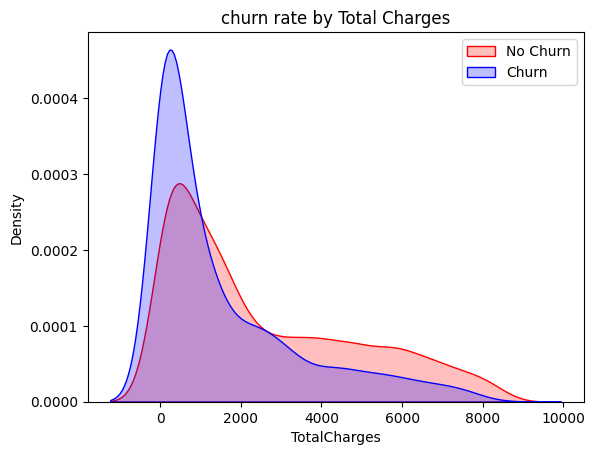

In [55]:
TotalCharges = sns.kdeplot(telco_data.TotalCharges[(telco_data.Churn == 'No')],color='Red',shade=True)
TotalCharges = sns.kdeplot(telco_data.TotalCharges[(telco_data.Churn == 'Yes')],color='Blue',shade=True)
TotalCharges.legend(labels=['No Churn','Churn'],loc='upper right')
TotalCharges.set_title('churn rate by Total Charges')

-by this plot we can analyze that the churn is higher when the charges are low
## checking the correlation between monthlycharges and totalcharges


In [56]:
telco_data.MonthlyCharges.corr(telco_data['TotalCharges']) #corr() function is used to perform correlation

0.6510648032262027

correlation is above '0' which means these variables are positively correlated.
##converting Churn column into dummies

In [57]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes', 1,0)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


### converting whole data set's categorical values into numerical values in order to perform further analysis

In [58]:
telco_dummies = pd.get_dummies(telco_data)  #get_dummies() function is used to convert the categorical data into numerical data
telco_dummies.head() #verfing whether the churn column is converted into 1 and 0

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


<Axes: >

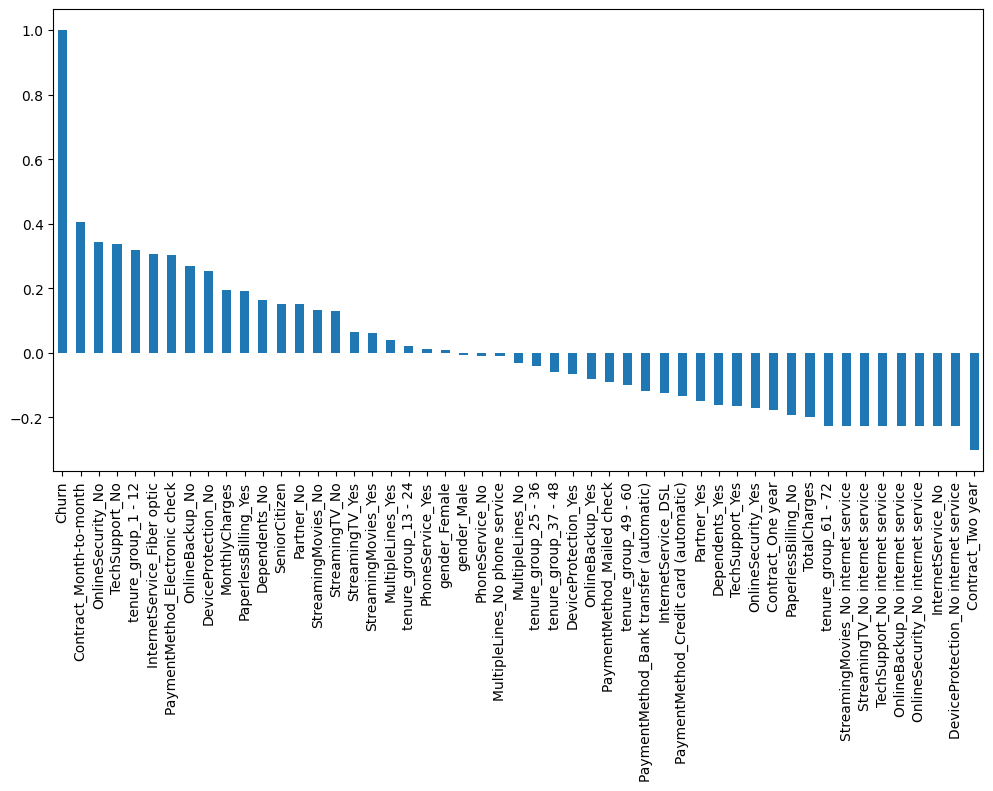

In [59]:
plt.figure(figsize=(12,6))  #giving th esize of plot
telco_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar') #plotting th egraph for correlation to check the outliers



In [60]:
new_df_target_0 = telco_data.loc[telco_data['Churn'] == 0]  #setting target dataframe for not churned customers
new_df_target_1 = telco_data.loc[telco_data['Churn'] == 1] #setting taget data frame for churned customers

In [61]:
#creating a funtion to get the dsired plot
def uniplot(df, col, title, hue=None):
    plt.title(title)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')

    # Add values on the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

    plt.xticks(rotation=45, fontsize=7)
    plt.show()

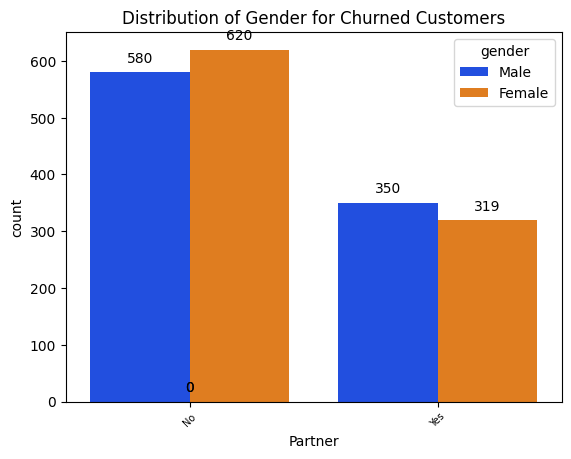

In [62]:
uniplot(new_df_target_1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

## the churned customers include
- about 51.47% female with no partner
-48.45% of female customers with partner
-48.33% of male without partner
-52.32% of male with partner


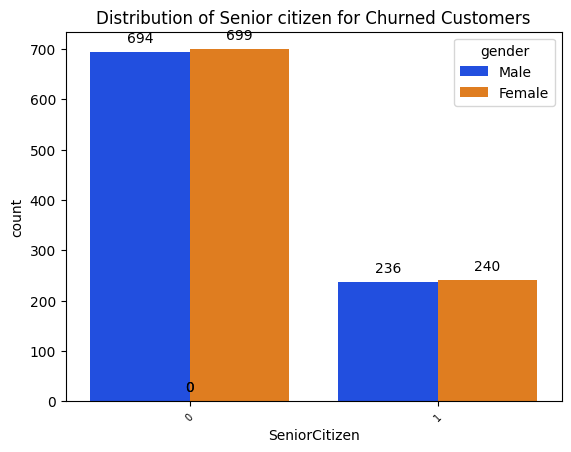

In [63]:
uniplot(new_df_target_1,col='SeniorCitizen',title='Distribution of Senior citizen for Churned Customers',hue='gender')

# the churn rate of customers include
###not senior citizen
- 50.18% female customers
-49.82% male customers
###Senior citizen
-50.42% female customers  
-49.58% male customers

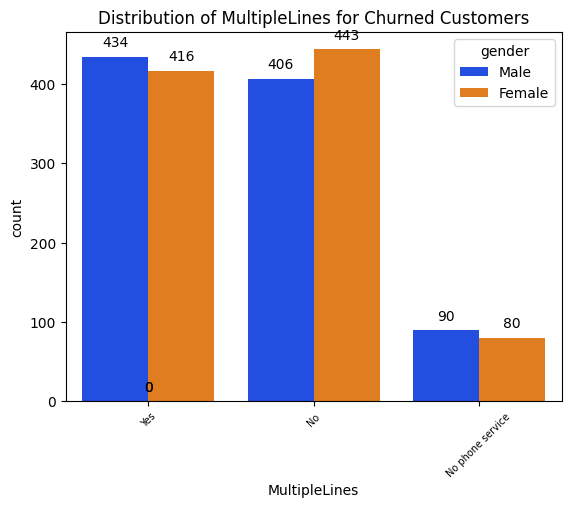

In [64]:
uniplot(new_df_target_1,col='MultipleLines',title='Distribution of MultipleLines for Churned Customers',hue='gender')

#churn rate for multiple lines with respect to gender :      
###Multiple lines
- 48.94% of female customers
-51.06% of male cutomers

##No multiple lines
- 52.18% of female customers
-47.82% of male customers

###No phone services
- 47.06% of female customers
-52.94% of male customers

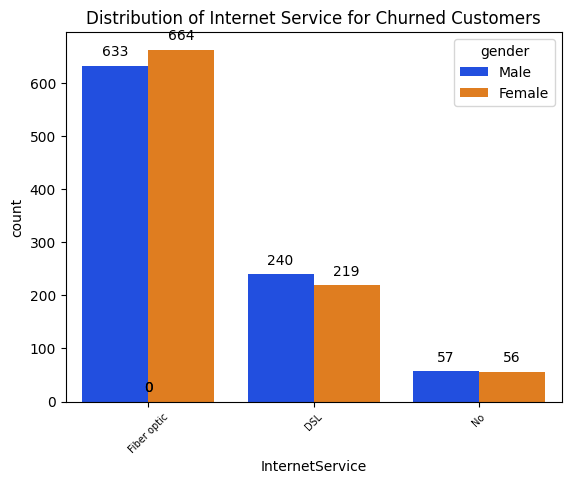

In [65]:
uniplot(new_df_target_1,col='InternetService',title='Distribution of Internet Service for Churned Customers',hue='gender')

## Churnrate of customers having different internet services based on gender
##Fiberoptic
- 51.20% of female customers
- 48.80% of male customers
##DSL
- 47.71% of female customers
- 52.29% of male customers
## No internet services
- 49.56% of female customers
- 50.44% of male customers

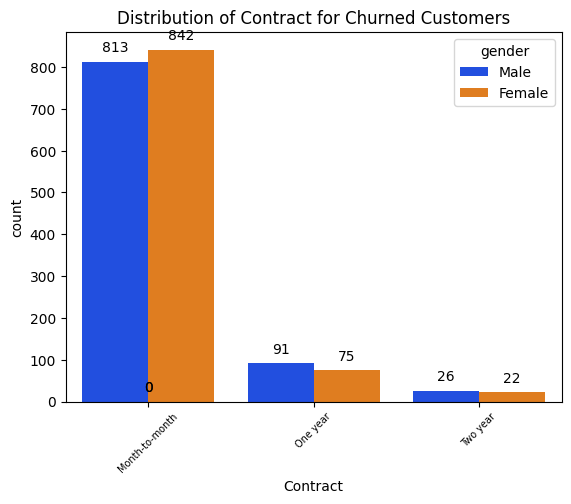

In [66]:
uniplot(new_df_target_1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

# churn rate of customers having different contracts based on gender
##Month-to-Month
- 50.88% of female customers
- 49.12% of male customers
##One-year contract
- 45.18% of female customers
- 54.82% of male customers
##Two year contract
- 45% of female customer
- 54.17% of male custumer

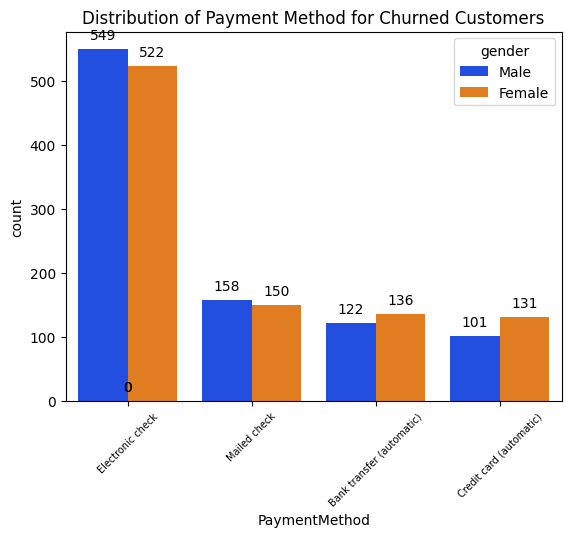

In [67]:
uniplot(new_df_target_1,col='PaymentMethod',title='Distribution of Payment Method for Churned Customers',hue='gender')


## churn rate of customers having different payment method based on gender
### Electronic check
- 48.74% of female customers
- 51.26% of male customers
###Mailed check
- 48.70% of female customers - 51.30% of male customers
### Bank transfer (Automatic)
- 53.08% of female customers
- 46.92% of customers
### Credit card (Automatic)
- 56.47% of female customers
- 43.53% of male customers

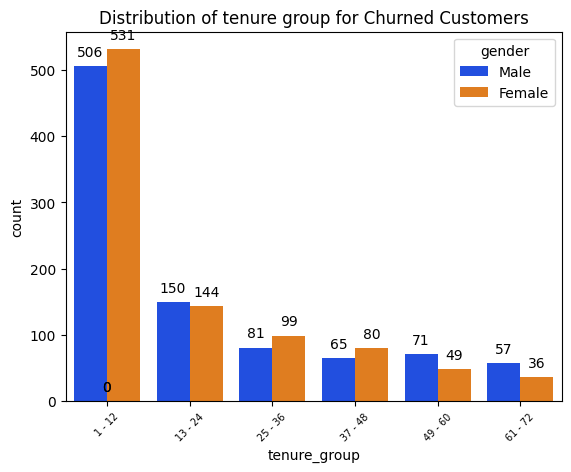

In [68]:
uniplot(new_df_target_1,col='tenure_group',title='Distribution of tenure group for Churned Customers',hue='gender')

##churn rate of customers of distinct tenure group based on gender
### 1-12
- 51.21% of female customers
- 49.79% of male customers
### 13-14
- 48.98% of female customers
- 51.02% of malw customers
### 25-36
- 55% of female customers
- 45% of male customers
### 37-48
- 55.17% of female customers
- 44.83% of male customers
### 49-60
- 40.83% of female customers
-59.17% of male customers
### 61-72
- 38.71% of female customers
-61.29% of male customers

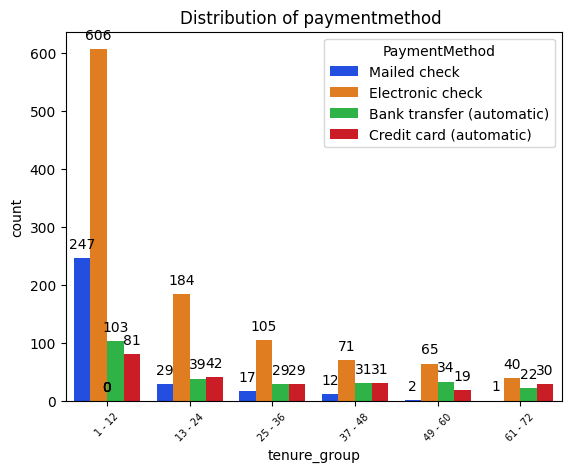

In [72]:
uniplot(new_df_target_1,col='tenure_group',title='Distribution of paymentmethod ',hue='PaymentMethod')

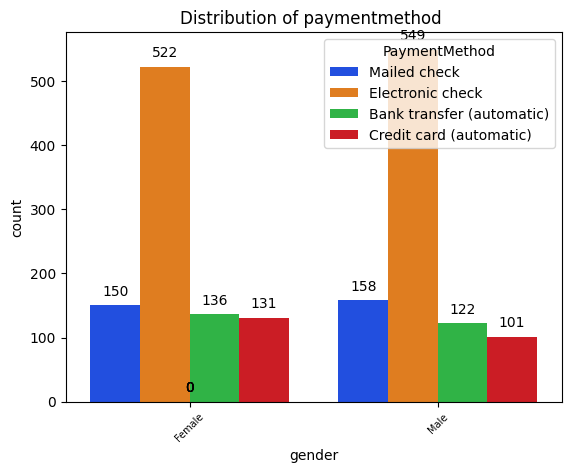

In [73]:
uniplot(new_df_target_1,col='gender',title='Distribution of paymentmethod ',hue='PaymentMethod')

- most of the customers prefer electronic check as their payment method

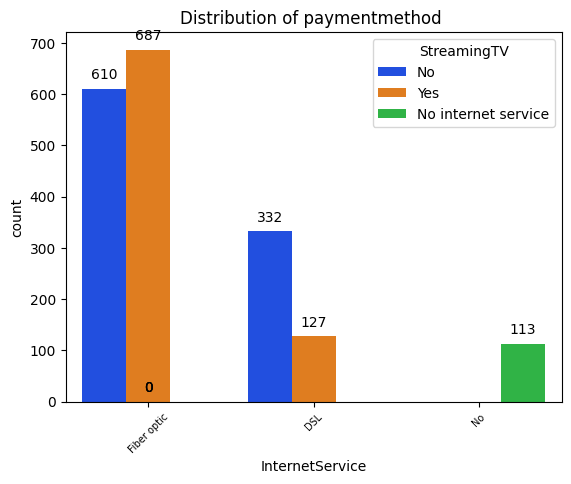

In [75]:
uniplot(new_df_target_1,col='InternetService',title='Distribution of paymentmethod ',hue='StreamingTV')

- customers with fiberoptic as internet services prefer streamingTV

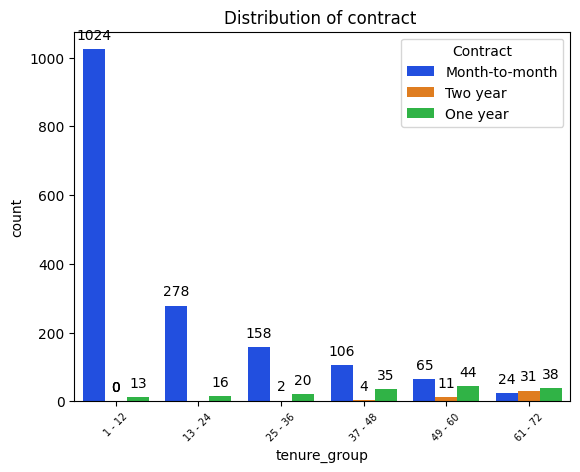

In [77]:
uniplot(new_df_target_1,col='tenure_group',title='Distribution of contract ',hue='Contract')

##noticible insights :
- A predominant factor contributing to increased churn rates may be the prevalence of month-to-month contracts among customers.
- Customers who have all amenities such as streaming TV, movies, internet services, and tech support included in their package are less prone to churning compared to those without any contractual commitment.
- The majority of customers who churn opt for electronic check as their payment method, indicating that this payment option is associated with higher churn rates
-A notable proportion of customers who utilize fiber optic internet service are also demonstrating churn behavior.
-As monthly charges rise, the churn rate tends to increase.